In [62]:
# Package Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are downloaded
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
# Load the data from 'FAALLO ARUURIN.csv' into a pandas DataFrame
# Reading the data from data.txt file
with open('data.txt', 'r', encoding='utf-8') as file:
    documents = file.readlines()

# Creating a DataFrame
df = pd.DataFrame(documents, columns=['text'])
print(df.head())

                                                text
0  "Safaaradda Mareykanka ayaa mar kale ugu baaqd...
1  "Madaxweynaha Dowlad Goboleedka Jubbaland Axme...
2  "Beesha Caalamka ayaa ka hadashay doorashooyin...
3  "Maleeshiyaad hubeysan ayaa laba qof oo Shacab...
4  "Is rasaaseynta ayaa Magaalada Buuhoodle ee Go...


In [64]:
# Display the shape of the DataFrame
df.shape

(10130, 1)

In [65]:
# Display the concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10130 entries, 0 to 10129
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10130 non-null  object
dtypes: object(1)
memory usage: 79.3+ KB


In [66]:
# Checking for missing values
print(df.isnull().sum())

text    0
dtype: int64


In [67]:
# Dropping rows with missing values
df = df.dropna()

In [68]:
# Removing duplicates
df = df.drop_duplicates()

In [69]:
df.shape

(10055, 1)

In [70]:
# List of Somali stop words
somali_stop_words  = [
    'waa', 'waana','balse','iyadoo','ma', 'waan','laga','isagoo','la', 'ah', 'oo', 'ee', 'waxey','waxay',
    'lasoo' , 'ugu', 'waxa','uu','eeyga','loo', 'sii','Haddaba', 'haddii','loona','hadda','inkastoo',
     'kula','waxuu', 'uga',  'soo', 'si', 'ku', 'kuu',  'kasoo', 'eey', 'iyo', 'aad', 'baan', 'u', 
    'leh', 'beey', 'ahna','yahay','mana','waxaana','sida','kaddib','dib','maxay','inay','inaan',
     'inaana','inaanay','inaaney','lakin',  'kale','ka', 'inuu', 'in','hadana', 'dhan','ayuu','aaney',
      'ayee',  'ayaa','kala','kule', 'sidoo', 'kalena','aysan', 'laakiin','hor','ayay','kuwaas',
       'wali','isku','halkaasoo','ay','kuna','aan','isla','markaana','ahaanba','iyadoo','inta',
        'aysan','kamid', 'kaasoo','wax' ,'kala','Guud','intaas','Muxuu','awgeed','miyuu','inuu',
        'iska','kamid','kaliya','markiiba','Kuwo','Kuwa','intaysan','wuxuuna','xitaa','kuwee',
         'kuwaas','kuwa','kuwaas','kuwii','intii','intaa','dabadeed','yihiin','gabi','iskaba', 
         'ahaanba','awgii','isugu','kuwaasoo','kaddibna', 'waxba','usoo','lagama','wuu',
        'lamana','lasoo','naga','loogu','aadka','kii','kana','idiin','inoo','aynu','yaa','iney',
        'waxaan','waxaa','waliba','kasta','ilaa','ahayd','waxana','ina','inan','waxaas','maxaad',
         'lagu','wixii','uusan','walba','ahayn','wuxuu','inaga','kuwo','ila','wada','una','xataa',
         'walina','way','inaad','kama','ahaa','lama','kaga','kaas','nagu','aay','ha','aaynu',
         'uma','ayaad','kusoo','aha','sidee','iskugu','kalana','kamida','hore','inkasta','iwm',
          'waxayna','hase','maxaan','ayaana','kahor','kadib','kaa','aheyn' ,'kugu','waxaanu',
           'kan', 'ayey' ,'kaasi',"noo",'iga','iigu','ayayna','inuusan','baannu','looga','idin' ,
           'kadibna','ahaatee','ama','waaye','nooga','isu','kaleba','maxaa','islamarkaana','lagala', 
            'soo','wuxi','kastaba','naloo','walbo','kuma','is','mise','igu','lakiin','baa','yaan'
            ,'nagala','amase','haa','waxaad','idiinku','maxad','kasii','baad','waxan','sidii',
            'kuwaasi','muxuu','iskeed','ula','nugul','horta','intiisa','yeeshee','kusii','uugu','sideen'
            ,'unbuu','looguna','inaanu','markuu','bal',"mooyee",'hadduu','midba','wuxu','waayo','iima','iimaanu',
            'waxsoo','caadiga','innoo','aanad','lala','amma','waad','kuugu','hadii','markaa','hasii','lee','anaan'
            ,'ii','tankale','weeyaan','waase','isoo','haatan','haddana','waxaanay','hadaan','ayna','uuna','inaysan'
                ,'aya','laguna','laguma','ta','inaa','lkn','haku','hasoo','waayahay','kulasoo','laakin','sidaas', 'aa'
]

In [72]:
somali_stop_words

['waa',
 'waana',
 'balse',
 'iyadoo',
 'ma',
 'waan',
 'laga',
 'isagoo',
 'la',
 'ah',
 'oo',
 'ee',
 'waxey',
 'waxay',
 'lasoo',
 'ugu',
 'waxa',
 'uu',
 'eeyga',
 'loo',
 'sii',
 'Haddaba',
 'haddii',
 'loona',
 'hadda',
 'inkastoo',
 'kula',
 'waxuu',
 'uga',
 'soo',
 'si',
 'ku',
 'kuu',
 'kasoo',
 'eey',
 'iyo',
 'aad',
 'baan',
 'u',
 'leh',
 'beey',
 'ahna',
 'yahay',
 'mana',
 'waxaana',
 'sida',
 'kaddib',
 'dib',
 'maxay',
 'inay',
 'inaan',
 'inaana',
 'inaanay',
 'inaaney',
 'lakin',
 'kale',
 'ka',
 'inuu',
 'in',
 'hadana',
 'dhan',
 'ayuu',
 'aaney',
 'ayee',
 'ayaa',
 'kala',
 'kule',
 'sidoo',
 'kalena',
 'aysan',
 'laakiin',
 'hor',
 'ayay',
 'kuwaas',
 'wali',
 'isku',
 'halkaasoo',
 'ay',
 'kuna',
 'aan',
 'isla',
 'markaana',
 'ahaanba',
 'iyadoo',
 'inta',
 'aysan',
 'kamid',
 'kaasoo',
 'wax',
 'kala',
 'Guud',
 'intaas',
 'Muxuu',
 'awgeed',
 'miyuu',
 'inuu',
 'iska',
 'kamid',
 'kaliya',
 'markiiba',
 'Kuwo',
 'Kuwa',
 'intaysan',
 'wuxuuna',
 'xitaa',
 'ku

In [73]:
# Display basic statistics
print(df.describe())

                                                     text
count                                               10055
unique                                              10055
top     "Safaaradda Mareykanka ayaa mar kale ugu baaqd...
freq                                                    1


In [74]:
# Fill NaN values in 'Faallo' column with empty string
df['text'] =  df['text'].fillna('')
# Function to remove stop words
def remove_stop_words(text):
    if isinstance(text, str):
        return ' '.join([word for word in text.split() if word.lower() not in somali_stop_words])
    else:
        return text

# Apply the function to the comments column
df['text'] = df['text'].apply(remove_stop_words)

print(df.head())




                                                text
0  "Safaaradda Mareykanka mar baaqday Madaxda Soo...
1  "Madaxweynaha Dowlad Goboleedka Jubbaland Axme...
2  "Beesha Caalamka hadashay doorashooyinka Golah...
3  "Maleeshiyaad hubeysan laba qof Shacab dileen ...
4  "Is rasaaseynta Magaalada Buuhoodle Gobolka To...


[('a', 1667500), (' ', 844731), ('d', 471302), ('i', 448312), ('o', 339879), ('e', 333920), ('n', 281412), ('l', 274060), ('y', 259043), ('h', 244139), ('r', 243415), ('s', 219237), ('u', 174656), ('k', 169652), ('m', 166469), ('g', 162775), ('b', 155010), ('t', 106029), ('x', 82993), ('w', 76195)]


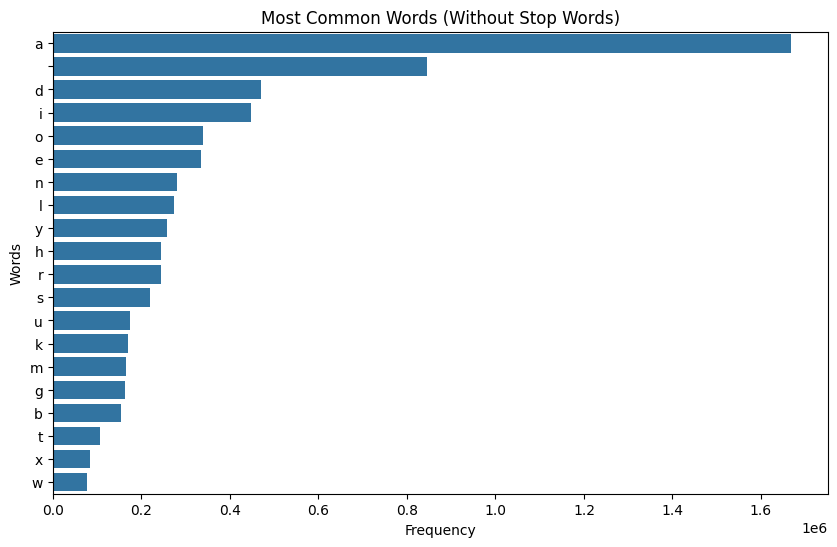

In [75]:
# Flatten the list of tokens without stop words
all_tokens_no_stop = [token for sublist in df['text'] for token in sublist]

# Get word frequencies without stop words
word_freq_no_stop = Counter(all_tokens_no_stop)

# Display the most common words without stop words
most_common_words_no_stop = word_freq_no_stop.most_common(20)
print(most_common_words_no_stop)

# Plot the most common words without stop words
words_no_stop, counts_no_stop = zip(*most_common_words_no_stop)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts_no_stop), y=list(words_no_stop))
plt.title('Most Common Words (Without Stop Words)')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

[(('a', ' '), 325679), (('a', 'a'), 254820), (('d', 'a'), 189041), (('a', 'd'), 174207), (('h', 'a'), 134127), (('a', 'n'), 134002), (('k', 'a'), 125087), (('a', 'y'), 123569), (('a', 'l'), 113158), (('a', 'r'), 111705), ((' ', 'd'), 110890), (('e', 'e'), 101233), (('n', ' '), 98643), (('g', 'a'), 95962), (('l', 'a'), 92867), (('m', 'a'), 92102), (('o', 'o'), 90029), (('y', ' '), 80747), (('i', 'i'), 79832), (('y', 'a'), 74955)]
[(('a', 'd', 'a'), 93546), (('k', 'a', ' '), 92482), (('d', 'a', ' '), 87180), (('a', 'y', ' '), 74724), (('a', 'n', ' '), 60513), (('a', 'a', 'n'), 51909), (('a', 'a', 'l'), 49280), (('a', 'h', 'a'), 49059), (('a', ' ', 'd'), 40643), (('h', 'a', ' '), 40626), (('l', 'k', 'a'), 36061), (('i', 'y', 'a'), 35735), ((' ', 'd', 'h'), 35263), (('a', 'r', 'a'), 33649), (('m', 'a', 'a'), 32976), (('g', 'a', 'a'), 32500), ((' ', 'M', 'a'), 30916), (('a', 'a', 'r'), 30021), ((' ', 'd', 'a'), 29537), (('s', 'h', 'a'), 28800)]


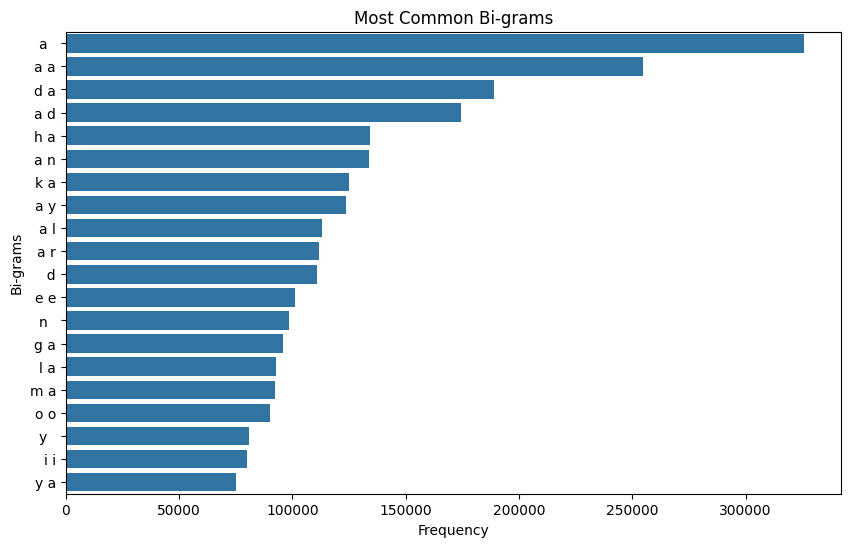

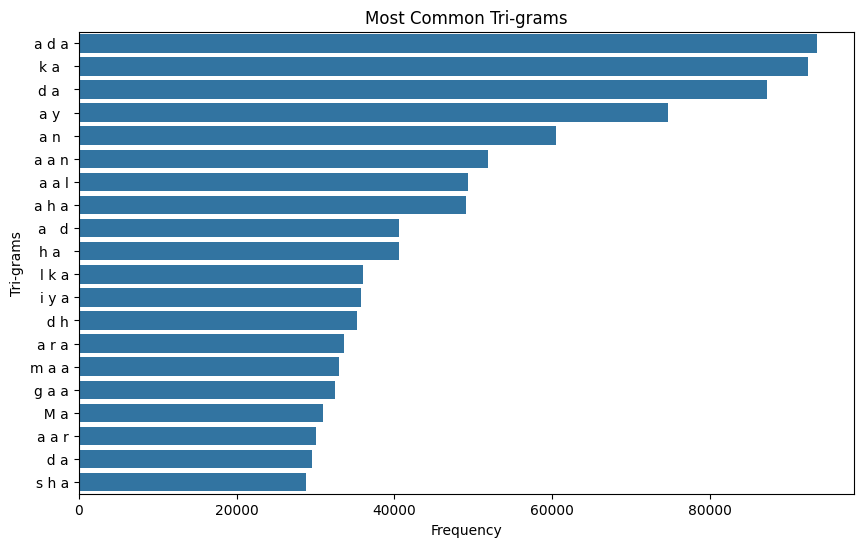

In [78]:
from nltk.util import ngrams

# Function to generate n-grams
def generate_ngrams(text, n):
    return list(ngrams(text, n))

# Generate bi-grams and tri-grams
df['bigrams'] = df['text'].apply(lambda x: generate_ngrams(x, 2))
df['trigrams'] = df['text'].apply(lambda x: generate_ngrams(x, 3))

# Flatten the list of n-grams
all_bigrams = [bigram for sublist in df['bigrams'] for bigram in sublist]
all_trigrams = [trigram for sublist in df['trigrams'] for trigram in sublist]

# Get bi-gram and tri-gram frequencies
bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

# Display the most common bi-grams and tri-grams
most_common_bigrams = bigram_freq.most_common(20)
most_common_trigrams = trigram_freq.most_common(20)
print(most_common_bigrams)
print(most_common_trigrams)

# Plot the most common bi-grams
bigrams, bigram_counts = zip(*most_common_bigrams)
bigrams = [' '.join(bigram) for bigram in bigrams]
plt.figure(figsize=(10, 6))
sns.barplot(x=list(bigram_counts), y=list(bigrams))
plt.title('Most Common Bi-grams')
plt.xlabel('Frequency')
plt.ylabel('Bi-grams')
plt.show()

# Plot the most common tri-grams
trigrams, trigram_counts = zip(*most_common_trigrams)
trigrams = [' '.join(trigram) for trigram in trigrams]
plt.figure(figsize=(10, 6))
sns.barplot(x=list(trigram_counts), y=list(trigrams))
plt.title('Most Common Tri-grams')
plt.xlabel('Frequency')
plt.ylabel('Tri-grams')
plt.show()

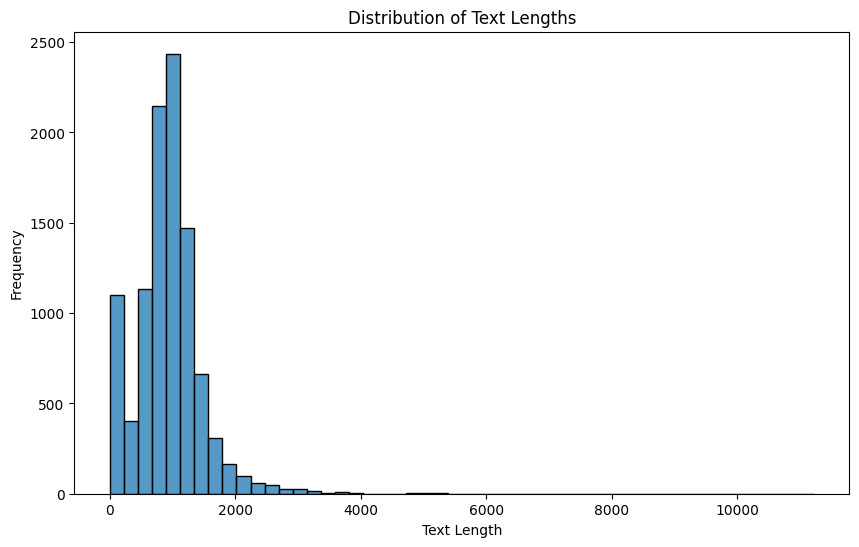

In [79]:
# Calculate text lengths
data['text_length'] = data['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

[(',', 42610), ('.', 10491), ('``', 9805), ('’', 9475), ("''", 8924), ('sheegay', 8233), ('Soomaaliya', 8081), ('Maxamed', 5150), ('dalka', 5087), ('Magaalada', 5017), ('Ciidamada', 4747), ('Gobolka', 4650), ('tirsan', 3979), ('dowladda', 3724), ('mid', 3530), ('Madaxweynaha', 3143), ('”', 2899), ('Puntland', 2892), ('degmada', 2846), ('markii', 2836)]


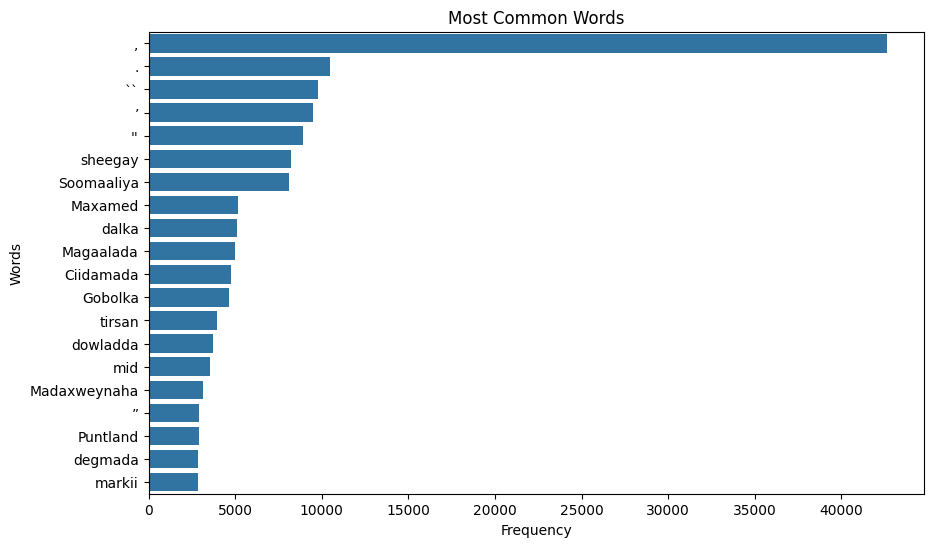

In [80]:
# Tokenize the text
df['tokens'] = df['text'].apply(word_tokenize)

# Flatten the list of tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Get word frequencies
word_freq = Counter(all_tokens)

# Display the most common words
most_common_words = word_freq.most_common(20)
print(most_common_words)

# Plot the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

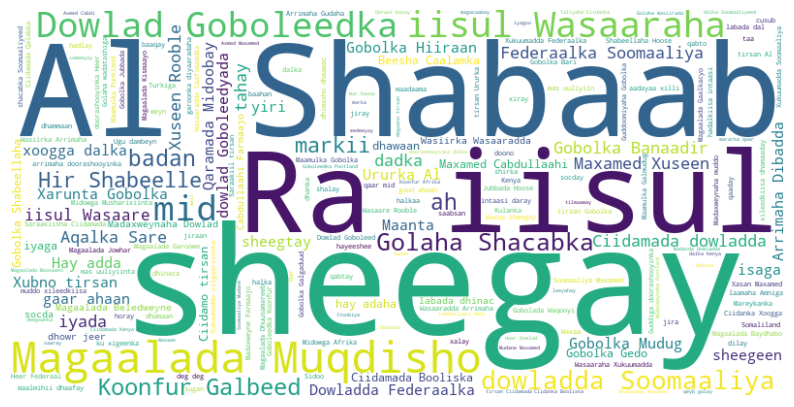

In [81]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_tokens))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
